Zuveir Jameer

7 December 2022

Imperial Business Analytics
The week 9 execises. 

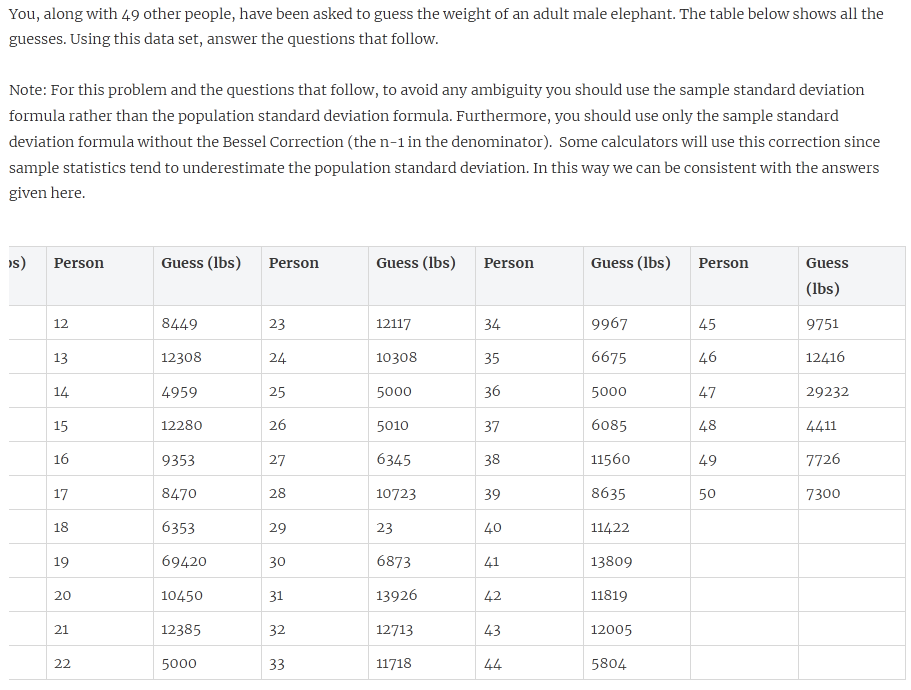

Answers from Imperial:
>If you computed the sample SD with (plain formula) as suggested in the instructions in the question, then the answer is 9,579.19. However, if you considered that this is an estimation problem instead, where you want to find the population SD from the measurements in the sample, then you may have used (Bessel-corrected formula) and the answer should then be 9,482.91. If you want more information about these approaches, review the Wikipedia explanation of estimation and standard deviation or discuss it with your Learning Facilitator in the Office Hour. 

In [1]:
import pandas as pd

df = pd.read_csv("D:\\Private\\Imperial Business Analytics\\Week 9\\elephant.csv")

In [2]:
df

,Person
0,Guess (lbs)
1,1
2,8319
3,12
4,8449
...,...
96,5000
97,33
98,11718
99,44


Select alternate even rows

df[0::2]

Select alternate even rows. Rename the column

In [3]:
weightdf=df[0::2].loc[1:].rename(columns={'Person':'weight_lbs'})

Selects alternate odd rows

In [4]:
persondf=df[1::2]

Add Index to both dataframes

In [5]:
newpersondf=persondf.reset_index()

In [6]:
newweightdf=weightdf.reset_index()

Combine using the newly created index
https://www.statology.org/pandas-merge-on-index/

In [7]:
combineddf=pd.merge(newpersondf,newweightdf,left_index=True, right_index=True)

Convert the columns from string to integer

In [8]:
combineddf['Person']=combineddf['Person'].astype(int)
combineddf['weight_lbs']=combineddf['weight_lbs'].astype(int)

Index_x and Index_y are the original index of each of the series. These columns are dropped

In [9]:
finaldf=combineddf.sort_values(by=['Person'],ascending=True ).drop(['index_x','index_y'],axis=1)

In [10]:
finaldf['weight_lbs'].agg(['sum','mean','median'])

sum       522264.00
mean       10445.28
median      9552.00
Name: weight_lbs, dtype: float64

Finds the mode

In [11]:
finaldf.mode(axis=0)

,Person,weight_lbs
0,1,5000.0
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


Standard Deviation.

Note corrected using Bessel-corrected formula
> https://dfrieds.com/math/bessels-correction.html

In [12]:
finaldf.std()

Person          14.577380
weight_lbs    9579.185013
dtype: float64

This shows that guesses of weight 23, 320, 29232 and 69420 are outliers. Estimate that a 46 percentiles lower and upper bound will remove these outliers

In [13]:
finaldf.sort_values(by='weight_lbs')

,Person,weight_lbs
32,29,23
5,2,320
19,48,4411
15,4,4489
11,14,4959
12,25,5000
13,36,5000
47,22,5000
17,26,5010
49,44,5804


Calculate the 46% lower and upper quartile. These values will act as index on what values need to ne removed from the dataset

In [14]:
finaldf.quantile([(.5-.46),(.5+.46)])

,Person,weight_lbs
0.04,2.96,4247.36
0.96,48.04,14538.24


Select the 46% lower and upper percentile data through a filter. Other method could be by calculating the actual index. For example: .04*50 = 2. First and second row can be eliminated. .096*50 = 48. row 49 and 50 can be eliminated.

In [15]:
adjusteddf=finaldf[(finaldf['weight_lbs'] < 14538.24) & (finaldf['weight_lbs'] > 4247.36)]

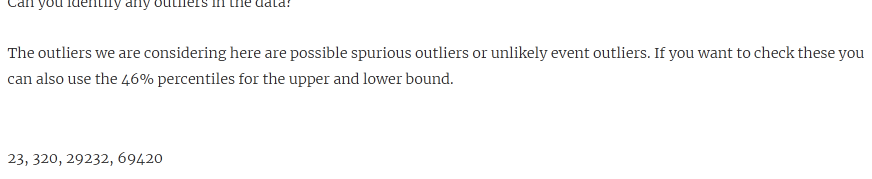

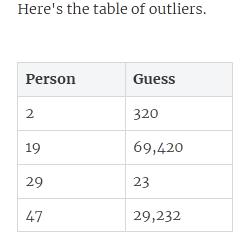

Removing the outliers had significant effect on the weight standard deviation as shown below:

Previous:

`Person          14.577380`

`weight_lbs    9579.185013`

NOTE: the Standard deviation has not been adjuested using Bessel's Correction 

https://dfrieds.com/math/bessels-correction.html

https://en.wikipedia.org/wiki/Standard_deviation#Estimation


New standard deviation is much smaller as shown below:

In [16]:
adjusteddf.std()

Person          14.409069
weight_lbs    2917.431700
dtype: float64

Previously the values were:

`mean       10445.28`

`median      9552.00`

Compare the above values with the values below. The new mean is now closer to the median. There could still be outliers

In [17]:
adjusteddf['weight_lbs'].agg(['sum','mean','median'])

sum       423269.0
mean        9201.5
median      9552.0
Name: weight_lbs, dtype: float64

Feedback from Imperial

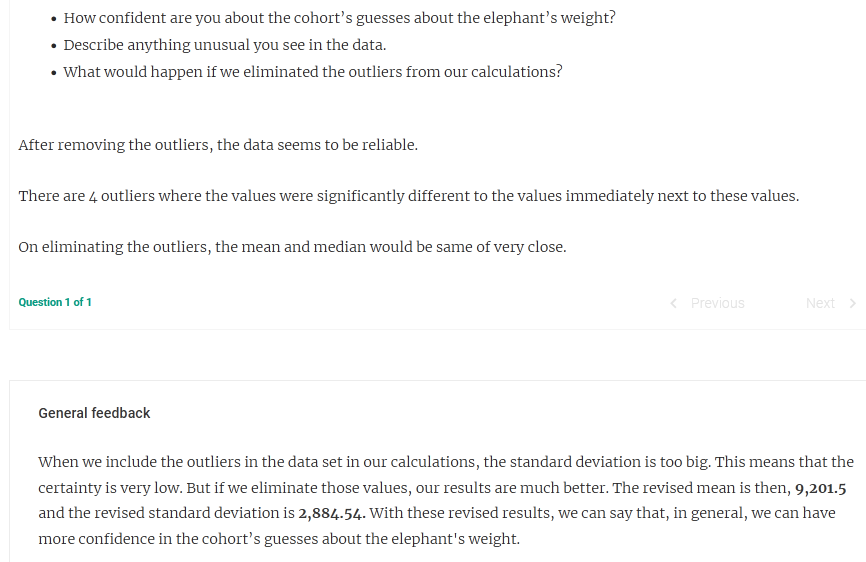